In [43]:
%load_ext autoreload
%autoreload 2
import kerasAC 
from kerasAC.generators.tiledb_generator import *
from kerasAC.tiledb_config import *

import tiledb 
gen=TiledbGenerator(batch_size=50,
                    ref_fasta="/mnt/data/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta",
                    tdb_array="/users/annashch/chip_and_dnase_db_H3K27Ac",
                    chroms=['chr21'],
                    num_inputs=3,
                    num_outputs=2,
                    tdb_input_datasets=['seq','H3K27Ac,H3K27Ac','H3K27Ac,H3K27Ac'],
                    tdb_output_datasets=['H3K27Ac,H3K27Ac,DNASE','H3K27Ac,H3K27Ac,DNASE'],
                    tdb_input_source_attribute=['seq','control_count_bigwig_plus_5p,control_count_bigwig_minus_5p','control_count_bigwig_plus_5p,control_count_bigwig_minus_5p'],
                    tdb_output_source_attribute=['count_bigwig_plus_5p,count_bigwig_minus_5p,count_bigwig_unstranded_5p','count_bigwig_plus_5p,count_bigwig_minus_5p,count_bigwig_unstranded_5p'],
                    tdb_input_flank=['3000','500,500','500,500'],
                    tdb_output_flank=['500,500,500','500,500,500'],
                    tdb_input_min=['None', 'None,None', 'None,None'], 
                    tdb_output_min=['None,None,None', 'None,None,None'],
                    tdb_input_max=['None','None,None','None,None'],
                    tdb_output_max=['None,None,None','None,None,None'],
                    tdb_input_aggregation=['None','None,None','sum,sum'],
                    tdb_input_transformation=['None','None,None','log,log'],
                    tdb_output_aggregation=['None,None,None','sum,sum,sum'],
                    tdb_output_transformation=['None,None,None','log,log,log'],
                    tdb_partition_attribute_for_upsample='overlap_peak',
                    tdb_partition_thresh_for_upsample=1,
                    tdb_partition_datasets_for_upsample=['H3K27Ac'],
                    upsample_ratio=1.0,
                    shuffle_epoch_start=False,
                    shuffle_epoch_end=False,
                    return_coords=True,
                    tdb_config=get_default_config(),
                    tdb_ctx=tiledb.Ctx(config=get_default_config()),
                    num_threads=24,
                    pseudocount=1)
                   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
opening:/users/annashch/chip_and_dnase_db_H3K27Ac for reading...
success!
got indices for used chroms
identified input dataset indices:[[], [0, 0], [0, 0]]
identified output dataset indices:[[0, 0, 1], [0, 0, 1]]
identified upsampling dataset indices:[0]
num_threads:24
starting getting indices to upsample in range:2777473071-2824183054
finished indices to upsample in range:2777473071-2824183054
closed upsampling pool
made upsampled index data frame
finished upsampling
created generator


In [44]:
gen.num_indices

46709983

In [45]:
gen.upsampled_indices_len

643447

In [50]:
(X,y,coords)=gen[0]

In [51]:
y[0].shape

(50, 1000, 3)

In [52]:
import matplotlib 
import matplotlib.pyplot as plt 

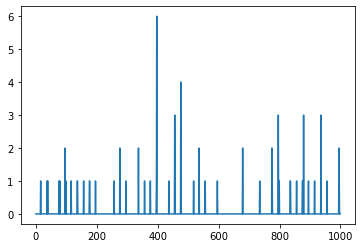

In [54]:
plt.plot(y[0][0,:,1])

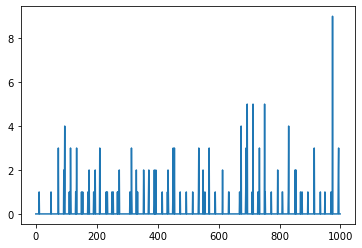

In [55]:
plt.plot(y[0][0,:,0])

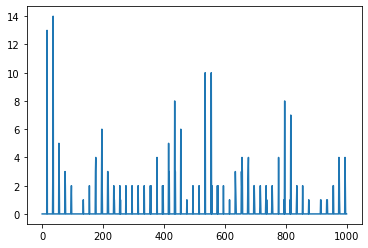

In [56]:
plt.plot(y[0][0,:,2])

In [ ]:
f.close()

In [ ]:
f=h5py.File('test.hdf5','w')

In [ ]:
dset=f.create_dataset('label_0',data=coords,maxshape=(None,)+coords.shape[1::])

In [ ]:
X1,y1,coords1=gen[1]

In [ ]:
coords1

In [ ]:
dset.resize(dset.shape[0]+y1[0].shape[0],axis=0)

In [ ]:
dset[-y1[0].shape[0]::]=y1[0]

In [ ]:
len(f['label_0'])